# Loan Eligibility Prediction

### Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn import preprocessing 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

### Loading Dataset

In [2]:
# loading dataset

df = pd.read_csv("train.csv")
validation_df = pd.read_csv("validation.csv")

## Exploratory Data Analysis (EDA)

In [3]:
######################## Exploratory Data Analysis ############################

print("Shape of the train dataset is: ", df.shape) # dataset has 493 rows and 13 columns
print("\nTop 5 rows in the train dataset are: \n\n",df.head(5)) # display the first 5 rows
print("\nColumns in the train dataset are: \n\n",df.columns) # display all the columns in the given dataset
print("\nDatatypes of the columns in the train dataset are: \n\n",df.dtypes) # display the datatypes of all the columns

print("\nTotal Columns in the train dataset is: ",len(df.columns))

print("\nTotal Categorical variables in the train dataset is: ",len(df.dtypes[df.dtypes=='object']))

print(len(np.unique(df['Loan_ID']))==len(df)) # True

# Loan_ID column has all unique values and not null values


Shape of the train dataset is:  (493, 13)

Top 5 rows in the train dataset are: 

       Loan_ID Gender Married Dependents     Education Self_Employed  \
0  ID001002XY   Male      No          0      Graduate            No   
1  ID001003XY   Male     Yes          1      Graduate            No   
2  ID001005XY   Male     Yes          0      Graduate           Yes   
3  ID001006XY   Male     Yes          0  Not Graduate            No   
4  ID001008XY   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0

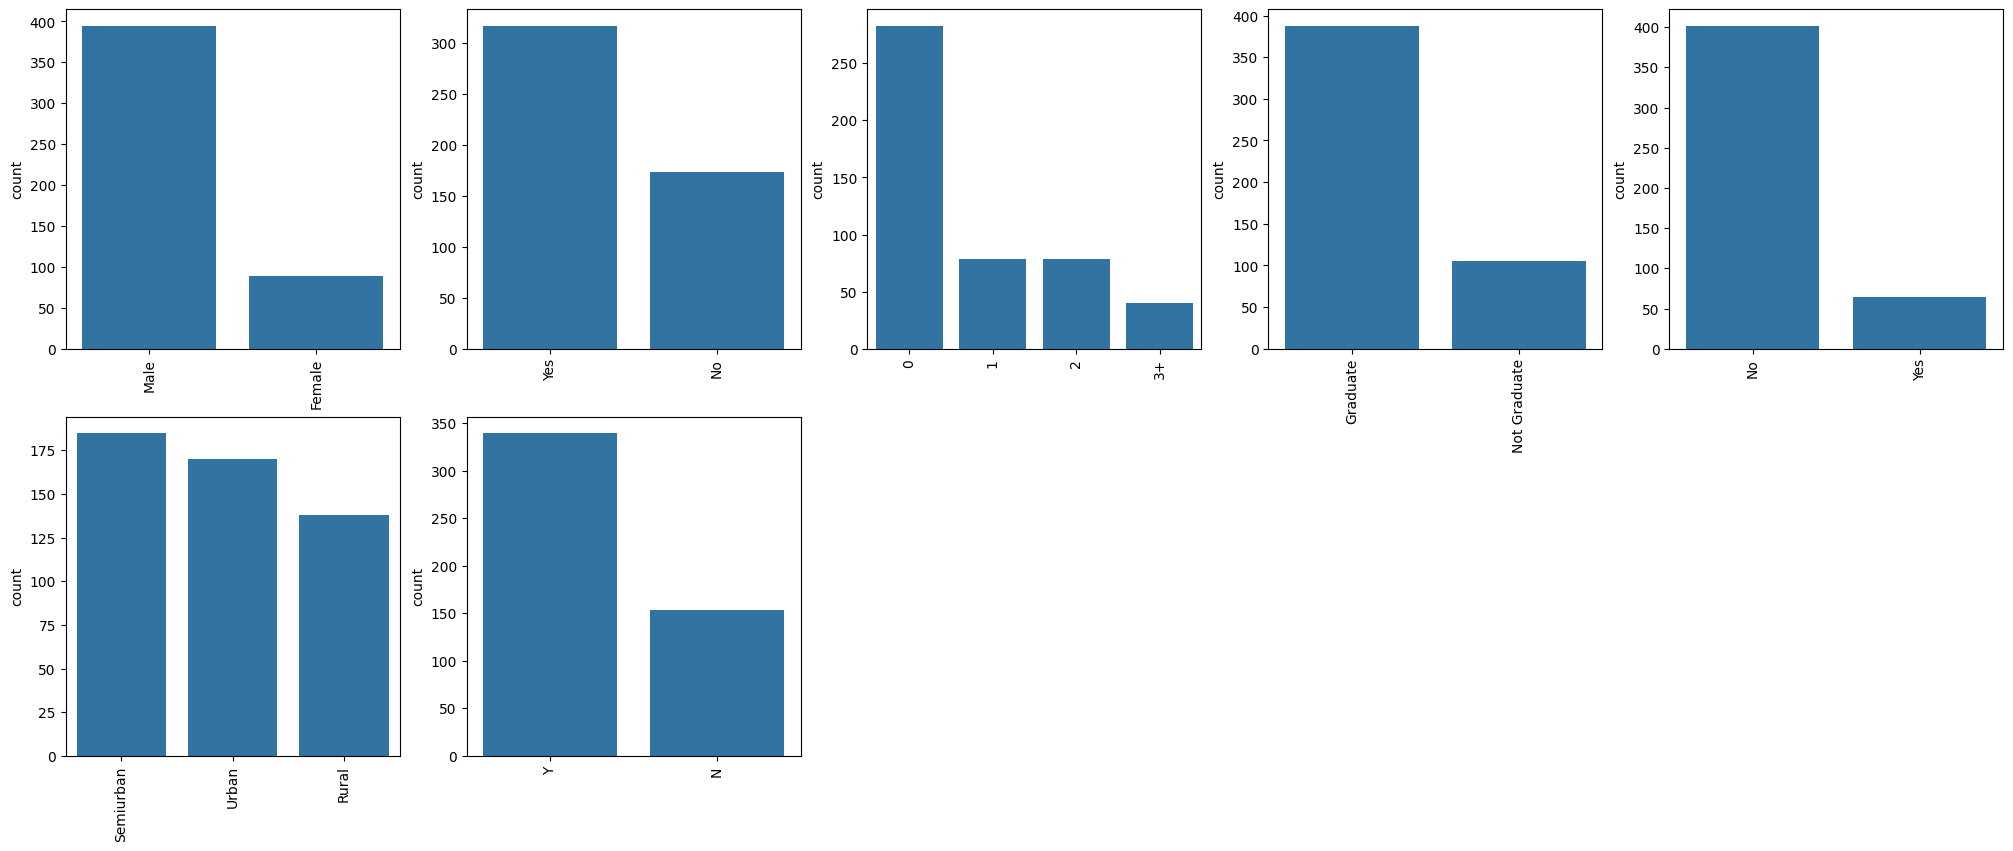

In [4]:
# visualize all the unique values of categorical variables

categorical = (df.dtypes == 'object') 
categorical_cols = list(categorical[categorical].index)
categorical_cols.remove('Loan_ID')
plt.figure(figsize=(25,52)) 
index = 1

for col in categorical_cols: 
    y = df[col].value_counts() 
    plt.subplot(10,5,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y)
    index +=1
plt.savefig('figures//combined.png', bbox_inches='tight')    

Gender
Male      395
Female     89
NaN         9
Name: count, dtype: int64
Percentage of Male: 80.12170385395537
Percentage of Female: 18.052738336713997


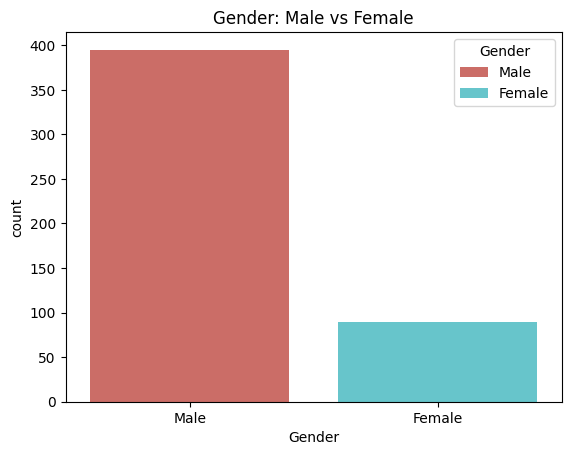

In [5]:
# Exploring each categorical variable

# 1. Gender
df['Gender'].unique()
print(df.Gender.value_counts(dropna=False))
print("Percentage of Male:", len(df[df['Gender']=='Male'])/len(df.Gender)*100)
print("Percentage of Female:", len(df[df['Gender']=='Female'])/len(df.Gender)*100)
sns.countplot(x="Gender", data=df,hue='Gender', palette="hls")
plt.title("Gender: Male vs Female")
plt.savefig('figures//Gender.png', bbox_inches='tight')  
plt.show()    
# Males are significantly higher than Feamles


['No' 'Yes' nan]
Married
Yes    317
No     173
NaN      3
Name: count, dtype: int64
Percentage of Yes: 64.3002028397566
Percentage of No: 35.09127789046653


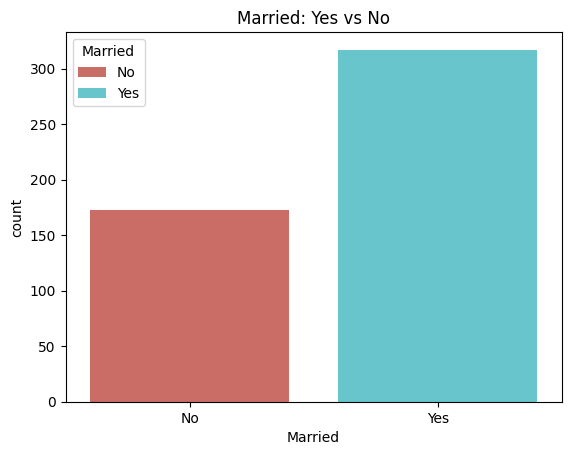

In [6]:
#2. Married

print(df['Married'].unique())
print(df.Married.value_counts(dropna=False))
print("Percentage of Yes:", len(df[df['Married']=='Yes'])/len(df.Married)*100)
print("Percentage of No:", len(df[df['Married']=='No'])/len(df.Married)*100)
sns.countplot(x="Married", data=df,hue='Married', palette="hls")
plt.title("Married: Yes vs No")
plt.savefig('figures//Married.png', bbox_inches='tight')  
plt.show() 

# Married are significantly higher than Non-Married


['0' '1' '2' '3+' nan]
Dependents
0      283
1       79
2       79
3+      40
NaN     12
Name: count, dtype: int64
Percentage of 0: 57.40365111561866
Percentage of 1: 16.024340770791078
Percentage of 2: 16.024340770791078
Percentage of 3+: 8.113590263691684


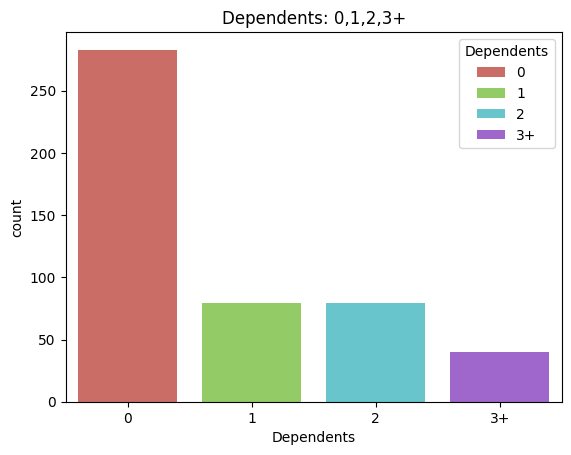

In [7]:
# 3. Dependents

print(df['Dependents'].unique())
print(df.Dependents.value_counts(dropna=False))
print("Percentage of 0:", len(df[df['Dependents']=='0'])/len(df.Dependents)*100)
print("Percentage of 1:", len(df[df['Dependents']=='1'])/len(df.Dependents)*100)
print("Percentage of 2:", len(df[df['Dependents']=='2'])/len(df.Dependents)*100)
print("Percentage of 3+:", len(df[df['Dependents']=='3+'])/len(df.Dependents)*100)
sns.countplot(x="Dependents", data=df,hue='Dependents', palette="hls")
plt.title("Dependents: 0,1,2,3+")
plt.savefig('figures//Dependents.png', bbox_inches='tight')  
plt.show() 

# Applicants which don't have dependents are significantly higher than applicants
# that have 1,2 and 3 or more than 3 dependents

['Graduate' 'Not Graduate']
Education
Graduate        388
Not Graduate    105
Name: count, dtype: int64
Percentage of Graduate: 78.70182555780933
Percentage of Not Graduate: 21.29817444219067


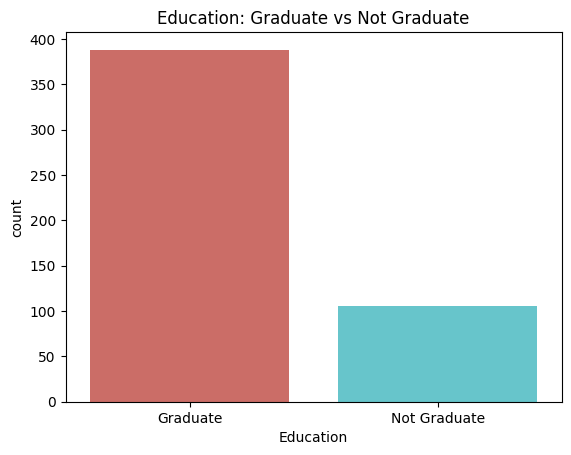

In [8]:
# 4.  Education

print(df['Education'].unique())
print(df.Education.value_counts(dropna=False))
print("Percentage of Graduate:", len(df[df['Education']=='Graduate'])/len(df.Education)*100)
print("Percentage of Not Graduate:", len(df[df['Education']=='Not Graduate'])/len(df.Education)*100)
sns.countplot(x="Education", data=df,hue='Education', palette="hls")
plt.title("Education: Graduate vs Not Graduate")
plt.savefig('figures//Education.png', bbox_inches='tight')  
plt.show() 

# Graduate applicants are significantly higher than non-graduate applicants

['No' 'Yes' nan]
Self_Employed
No     402
Yes     64
NaN     27
Name: count, dtype: int64
Percentage of Yes: 12.981744421906694
Percentage of No: 81.54158215010142


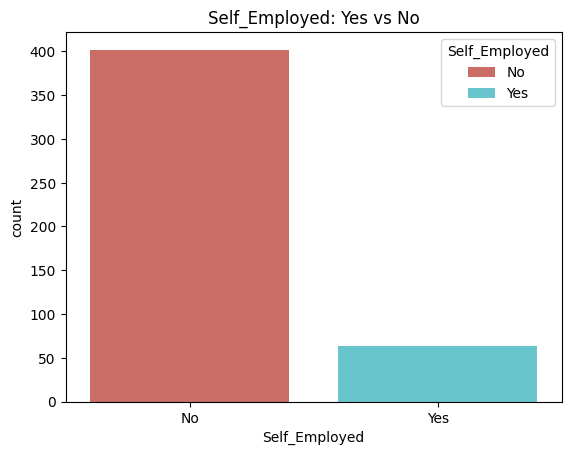

In [9]:
# 5. Self_Employed

print(df['Self_Employed'].unique())
print(df.Self_Employed.value_counts(dropna=False))
print("Percentage of Yes:", len(df[df['Self_Employed']=='Yes'])/len(df.Self_Employed)*100)
print("Percentage of No:", len(df[df['Self_Employed']=='No'])/len(df.Self_Employed)*100)
sns.countplot(x="Self_Employed", data=df,hue='Self_Employed', palette="hls")
plt.title("Self_Employed: Yes vs No")
plt.savefig('figures//Self_Employed.png', bbox_inches='tight')  
plt.show() 

# non-self_employed are significantly higher than applicants who are self-employed


['Urban' 'Rural' 'Semiurban']
Property_Area
Semiurban    185
Urban        170
Rural        138
Name: count, dtype: int64
Percentage of Urban: 34.48275862068966
Percentage of Rural: 27.99188640973631
Percentage of Semiurban: 37.52535496957404


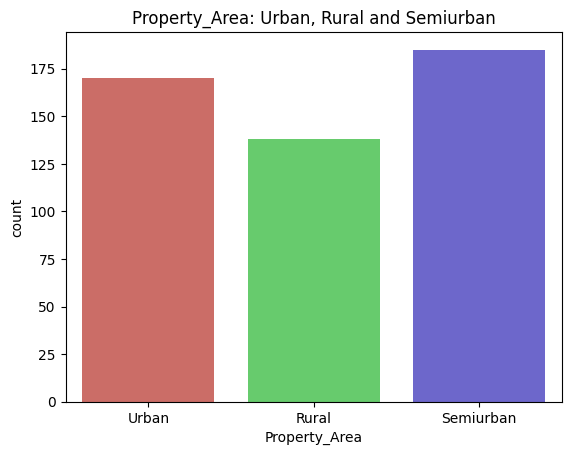

In [10]:
# 6. Property_Area

print(df['Property_Area'].unique())
print(df.Property_Area.value_counts(dropna=False))
print("Percentage of Urban:", len(df[df['Property_Area']=='Urban'])/len(df.Property_Area)*100)
print("Percentage of Rural:", len(df[df['Property_Area']=='Rural'])/len(df.Property_Area)*100)
print("Percentage of Semiurban:", len(df[df['Property_Area']=='Semiurban'])/len(df.Property_Area)*100)
sns.countplot(x="Property_Area", data=df,hue='Property_Area', palette="hls")
plt.title("Property_Area: Urban, Rural and Semiurban")
plt.savefig('figures//Property_Area.png', bbox_inches='tight')  
plt.show()

# All 3 categories or Urban, Rural and Semiurban are almost in equal proportion

[ 1.  0. nan]
Credit_History
1.0    383
0.0     70
NaN     40
Name: count, dtype: int64
Percentage of 1: 77.68762677484787
Percentage of 0: 14.198782961460447


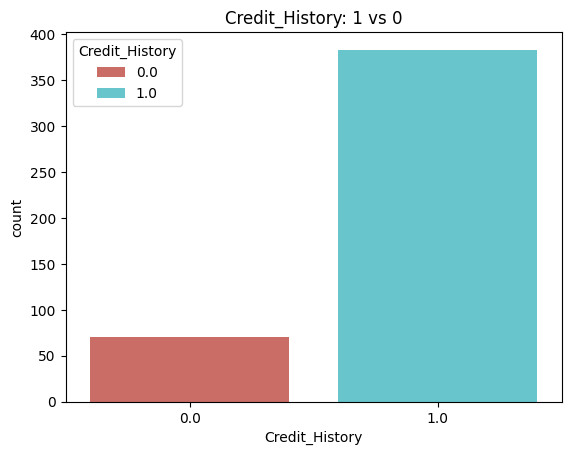

In [11]:
#  Exploring Numerical variables

# 7. Credit_History

print(df['Credit_History'].unique())
print(df.Credit_History.value_counts(dropna=False))
print("Percentage of 1:", len(df[df['Credit_History']==1.0])/len(df.Credit_History)*100)
print("Percentage of 0:", len(df[df['Credit_History']==0.0])/len(df.Credit_History)*100)
sns.countplot(x="Credit_History", data=df,hue='Credit_History', palette="hls")
plt.title("Credit_History: 1 vs 0")
plt.savefig('figures//Credit_History.png', bbox_inches='tight')  
plt.show()

# Applicants those have credit history are significantly higher than applicants
# those don't have credit history


In [12]:
#  8. ApplicantIncome

print(df['Loan_Amount_Term'].unique())
print(df.Loan_Amount_Term.value_counts(dropna=False))

# Number of applicants those have loan amount term as 360 are significantly higher than others

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.]
Loan_Amount_Term
360.0    410
180.0     35
NaN       14
300.0     12
480.0     12
120.0      3
240.0      3
60.0       2
36.0       1
84.0       1
Name: count, dtype: int64


['Y' 'N']
Loan_Status
Y    340
N    153
Name: count, dtype: int64
Percentage of Y: 68.96551724137932
Percentage of N: 31.03448275862069


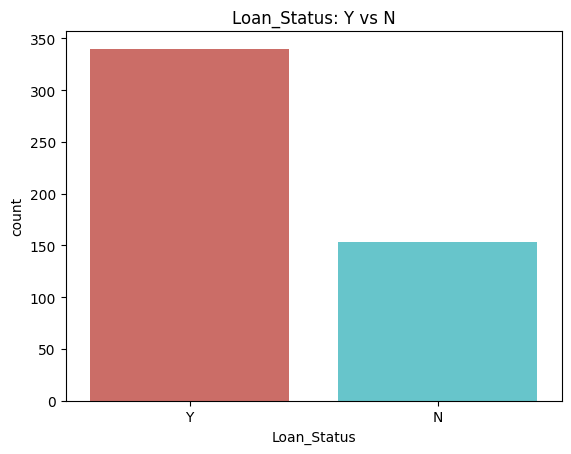

In [13]:
# 9. Loan_Status

print(df['Loan_Status'].unique())
print(df.Loan_Status.value_counts(dropna=False))
print("Percentage of Y:", len(df[df['Loan_Status']=='Y'])/len(df.Loan_Status)*100)
print("Percentage of N:", len(df[df['Loan_Status']=='N'])/len(df.Loan_Status)*100)
sns.countplot(x="Loan_Status", data=df,hue='Loan_Status', palette="hls")
plt.title("Loan_Status: Y vs N")
plt.savefig('figures//Loan_Status.png', bbox_inches='tight')  
plt.show() 

# Applicants those are eligible for loan are significantly higher than those applcants
# who are not eligible


In [14]:
# Other Numerical variables

print(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe())


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       493.000000         493.000000  475.000000        479.000000
mean       5489.316430        1503.267586  144.098947        343.590814
std        6536.512594        2142.152671   82.724115         61.334118
min         150.000000           0.000000   17.000000         36.000000
25%        2873.000000           0.000000  100.000000        360.000000
50%        3858.000000        1125.000000  127.000000        360.000000
75%        5746.000000        2253.000000  161.000000        360.000000
max       81000.000000       20000.000000  700.000000        480.000000


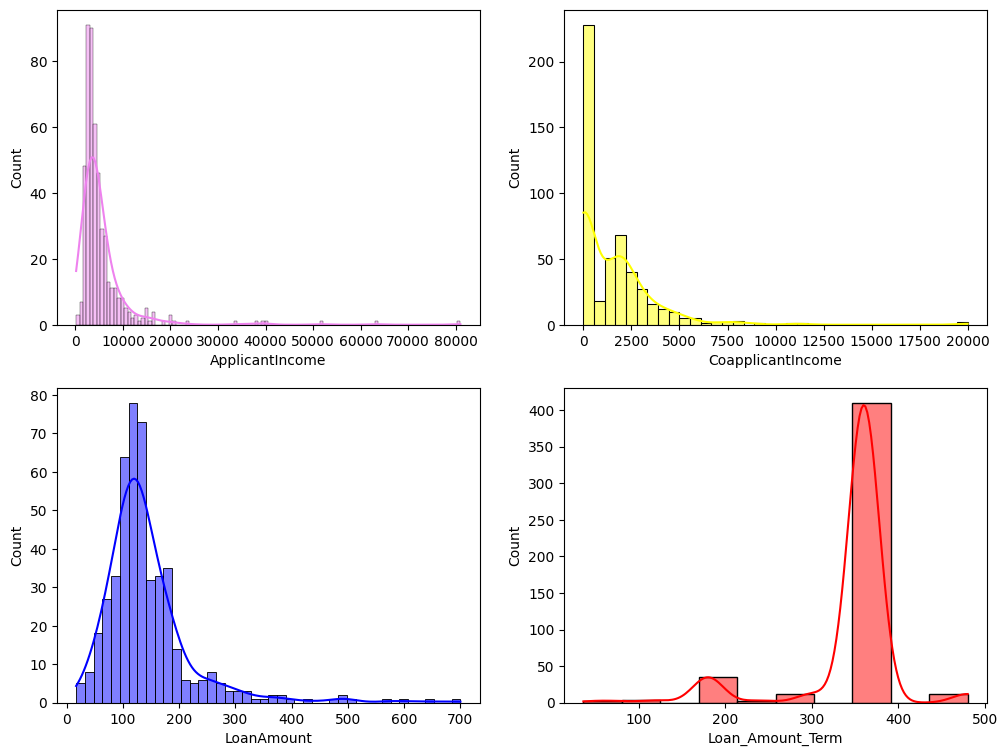

In [15]:
# Histograms

fig, axs = plt.subplots(2, 2, figsize=(12, 9))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='violet')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='yellow')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='blue');
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red');
plt.savefig('figures//NumVar_Hist.png', bbox_inches='tight')  
# Here, ApplicantIncome, CoapplicantIncome are positive skewed and has outliers and LoanAmount is little negative skewed
# Loan_Amount_Term feature has a outlier and negative skewed.


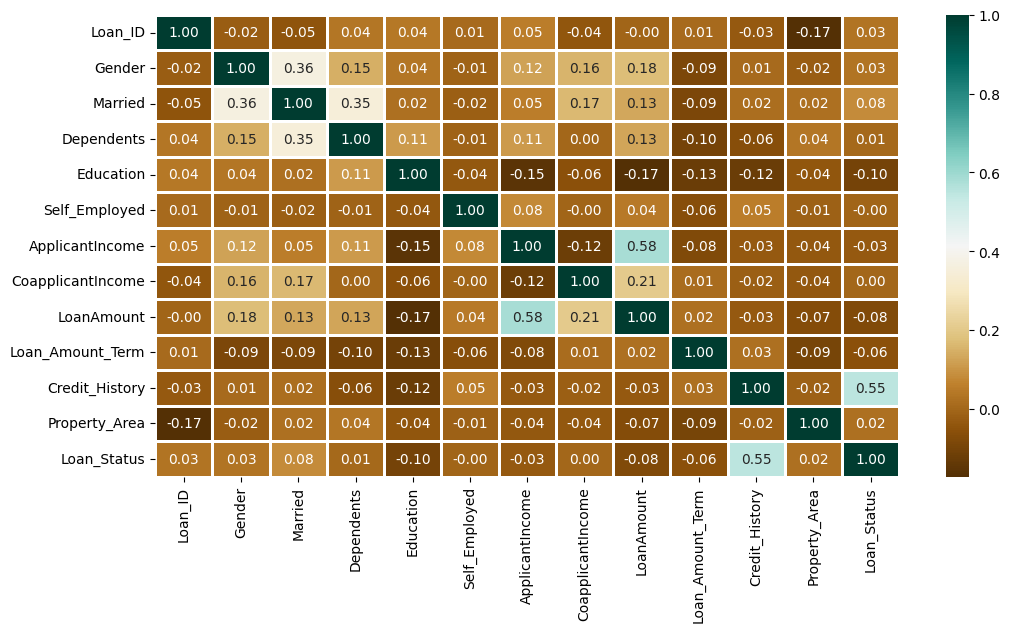

In [16]:
# Finding Correlation
df1=copy.copy(df)
label_encoder = preprocessing.LabelEncoder() 
cat = (df1.dtypes == 'object') 
for i in list(cat[cat].index): 
    df1[i] = label_encoder.fit_transform(df1[i])
    
plt.figure(figsize=(12,6)) 

sns.heatmap(df1.corr(),cmap='BrBG',fmt='.2f', linewidths=2,annot=True)
plt.savefig('figures//Correlation.png', bbox_inches='tight')  
# symmetric correlation matrix and loan_status is highly correlated with credit_history
# Gender/Dependents and Married are somewhat correlated
# LoanAmount and ApplicantIncome is correlated

# Loan_ID is very less correlated with other variables and the target variable and
# it is used for the primary key, we can drop it.


## Data Preprocessing

In [17]:
############################ Data Preprocessing  ##############################

print(df.isnull().sum())
print("#################################################")
print(validation_df.isnull().sum())

## Removing unnecessary variable

# Loan_ID is very less correlated with other variables and the target variable 
# and it is used as a primary key, so, we can drop it.


df = df.drop(['Loan_ID'], axis = 1)
validation_df = validation_df.drop(['Loan_ID'], axis = 1)

Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       40
Property_Area         0
Loan_Status           0
dtype: int64
#################################################
Loan_ID               0
Gender                4
Married               0
Dependents            3
Education             0
Self_Employed         5
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            4
Loan_Amount_Term      0
Credit_History       10
Property_Area         0
dtype: int64


In [18]:
## make the same datatypes

validation_df["CoapplicantIncome"] = validation_df["CoapplicantIncome"].astype(float)
validation_df["Loan_Amount_Term"] = validation_df["Loan_Amount_Term"].astype(float)  

## Imputing the missing values

# For missing valued categorical variables, we will use "mode".

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True) 
# Though Credit_History and Loan_Amount_Term is a numberical variable but 
# its values are in particular class like 0 and 1 and 360,180 etc and it is working as a categorical variable

# For missing valued numerical variables, we will use "mean".


df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

#######

validation_df['Gender'].fillna(validation_df['Gender'].mode()[0],inplace=True)
validation_df['Married'].fillna(validation_df['Married'].mode()[0],inplace=True)
validation_df['Dependents'].fillna(validation_df['Dependents'].mode()[0],inplace=True)
validation_df['Self_Employed'].fillna(validation_df['Self_Employed'].mode()[0],inplace=True)
validation_df['Credit_History'].fillna(validation_df['Credit_History'].mode()[0],inplace=True)
validation_df['Loan_Amount_Term'].fillna(validation_df['Loan_Amount_Term'].mode()[0],inplace=True) 
# Though Credit_History and Loan_Amount_Term is a numberical variable but 
# its values are in particular class like 0 and 1 and 360,180 etc and it is working as a categorical variable

# For missing valued numerical variables, we will use "mean".


validation_df['LoanAmount'].fillna(validation_df['LoanAmount'].mean(),inplace=True)


/tmp/ipykernel_36101/2255197945.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
/tmp/ipykernel_36101/2255197945.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [19]:
## Label Encoding (One-hot Encoding)

df = pd.get_dummies(df)

# removing unwanted columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename the columns    
df.rename(columns={'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}, inplace=True)
#df.replace({False: 0, True: 1}, inplace=True)
print("\nColumns are:\n\n",df.columns)

df["Gender"] = df["Gender"].astype(int)
df["Married"] = df["Married"].astype(int)
df["Dependents_0"] = df["Dependents_0"].astype(int)
df["Dependents_1"] = df["Dependents_1"].astype(int)
df["Dependents_2"] = df["Dependents_2"].astype(int)
df["Dependents_3+"] = df["Dependents_3+"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Self_Employed"] = df["Self_Employed"].astype(int)
df["Property_Area_Rural"] = df["Property_Area_Rural"].astype(int)
df["Property_Area_Semiurban"] = df["Property_Area_Semiurban"].astype(int)
df["Property_Area_Urban"] = df["Property_Area_Urban"].astype(int)
df["Loan_Status"] = df["Loan_Status"].astype(int)

#########

validation_df = pd.get_dummies(validation_df)

# removing unwanted columns
validation_df = validation_df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No'], axis = 1)

# Rename the columns    
validation_df.rename(columns={'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed'}, inplace=True)
#df.replace({False: 0, True: 1}, inplace=True)
print("\nColumns are:\n\n",validation_df.columns)

validation_df["Gender"] = validation_df["Gender"].astype(int)
validation_df["Married"] = validation_df["Married"].astype(int)
validation_df["Dependents_0"] = validation_df["Dependents_0"].astype(int)
validation_df["Dependents_1"] = validation_df["Dependents_1"].astype(int)
validation_df["Dependents_2"] = validation_df["Dependents_2"].astype(int)
validation_df["Dependents_3+"] = validation_df["Dependents_3+"].astype(int)
validation_df["Education"] = validation_df["Education"].astype(int)
validation_df["Self_Employed"] = validation_df["Self_Employed"].astype(int)
validation_df["Property_Area_Rural"] = validation_df["Property_Area_Rural"].astype(int)
validation_df["Property_Area_Semiurban"] = validation_df["Property_Area_Semiurban"].astype(int)
validation_df["Property_Area_Urban"] = validation_df["Property_Area_Urban"].astype(int)


Columns are:

 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education', 'Self_Employed', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

Columns are:

 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education', 'Self_Employed', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


In [20]:
print("\n number of rows in dataset before outlier removal:",len(df))
# ## Removing Outliers by using boxplots

Q1 = df.quantile(0.25) # 25 percentile 
Q3 = df.quantile(0.75) # 75 percentile
IQR = Q3 - Q1 # Interquartile range

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 

print("\n number of rows in dataset after outlier removal:",len(df))


 number of rows in dataset before outlier removal: 493

 number of rows in dataset after outlier removal: 114


In [21]:
# ApplicantIncome, CoapplicantIncome, and LoanAmount are positively skewed.
# So, we will use square root transformation to normalized the distribution.

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
validation_df.ApplicantIncome = np.sqrt(validation_df.ApplicantIncome)
validation_df.CoapplicantIncome = np.sqrt(validation_df.CoapplicantIncome)
validation_df.LoanAmount = np.sqrt(validation_df.LoanAmount)

/tmp/ipykernel_36101/4180333104.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


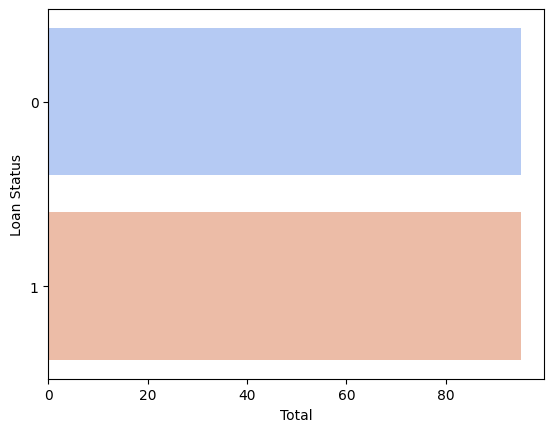

In [22]:
## Splitting into dependent and independent features

X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

## Data Imbalanced resolution

# As we have seen initially that Loan_Status column is imbalanced for classes
# so we use oversampling using SMOTE to avoid the overfitting problem

X, y = SMOTE().fit_resample(X, y)  

# check whether classes are baanced or not
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.savefig('figures//Balanced_Loan_Status.png', bbox_inches='tight')  
plt.show()

In [23]:
## Data Normalization


X = MinMaxScaler().fit_transform(X)

## Train-Test Split

# we make the 80% for training set and 20% for the validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


## Build and fit the Model and Evaluate the results

In [24]:
##############################  Models  #######################################

# 1. Logistic Regression

LogR_clf = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LogR_clf.fit(X_train, y_train)

y_pred = LogR_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LogR_Acc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy:',LogR_Acc*100)

              precision    recall  f1-score   support

           0       0.47      0.57      0.52        14
           1       0.71      0.62      0.67        24

    accuracy                           0.61        38
   macro avg       0.59      0.60      0.59        38
weighted avg       0.62      0.61      0.61        38

[[ 8  6]
 [ 9 15]]
Logistic Regression accuracy: 60.526315789473685


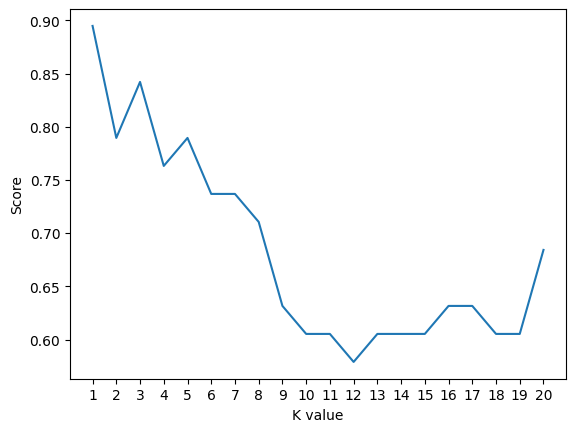

KNN best accuracy:  89.47368421052632


In [25]:
# 2. KNN

score_list = []
for i in range(1,21):
    KNN_clf = KNeighborsClassifier(n_neighbors = i)
    KNN_clf.fit(X_train, y_train)
    score_list.append(KNN_clf.score(X_test, y_test))
    
plt.plot(range(1,21), score_list)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.savefig('figures//KNN.png', bbox_inches='tight')  
plt.show()
KNN_Acc = max(score_list)
print("KNN best accuracy: ",KNN_Acc*100)

In [26]:
# 3. SVM

SVC_clf = SVC(kernel='rbf', max_iter=500)
SVC_clf.fit(X_train, y_train)

y_pred = SVC_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVC_Acc = accuracy_score(y_pred,y_test)
print('SVC accuracy: ',SVC_Acc*100)

              precision    recall  f1-score   support

           0       0.47      0.57      0.52        14
           1       0.71      0.62      0.67        24

    accuracy                           0.61        38
   macro avg       0.59      0.60      0.59        38
weighted avg       0.62      0.61      0.61        38

[[ 8  6]
 [ 9 15]]
SVC accuracy:  60.526315789473685


In [27]:
# 4. Naive Bayes

# 4.1 Categorical NB

NB_clf1 = CategoricalNB()
NB_clf1.fit(X_train, y_train)

y_pred = NB_clf1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NB_Acc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: ',NB_Acc1*100)

# 4.2 Gaussian NB

NB_clf2 = GaussianNB()
NB_clf2.fit(X_train, y_train)

y_pred = NB_clf2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NB_Acc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: ',NB_Acc2*100)

              precision    recall  f1-score   support

           0       0.52      0.86      0.65        14
           1       0.87      0.54      0.67        24

    accuracy                           0.66        38
   macro avg       0.69      0.70      0.66        38
weighted avg       0.74      0.66      0.66        38

[[12  2]
 [11 13]]
Categorical Naive Bayes accuracy:  65.78947368421053
              precision    recall  f1-score   support

           0       0.48      0.86      0.62        14
           1       0.85      0.46      0.59        24

    accuracy                           0.61        38
   macro avg       0.66      0.66      0.60        38
weighted avg       0.71      0.61      0.60        38

[[12  2]
 [13 11]]
Gaussian Naive Bayes accuracy:  60.526315789473685


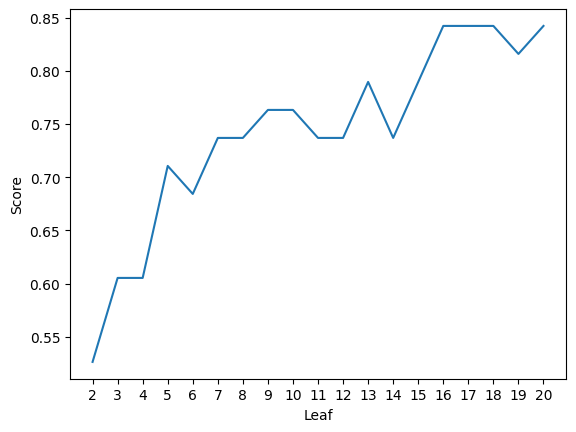

Decision Tree Accuracy:  84.21052631578947


In [28]:
# 5. Decision Tree

score_list= []
for i in range(2,21):
    DT_clf = DecisionTreeClassifier(max_leaf_nodes=i)
    DT_clf.fit(X_train, y_train)
    score_list.append(DT_clf.score(X_test, y_test))
    
plt.plot(range(2,21), score_list)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.savefig('figures//Decision_Tree.png', bbox_inches='tight')  
plt.show()
DT_Acc = max(score_list)
print("Decision Tree Accuracy: ",DT_Acc*100)

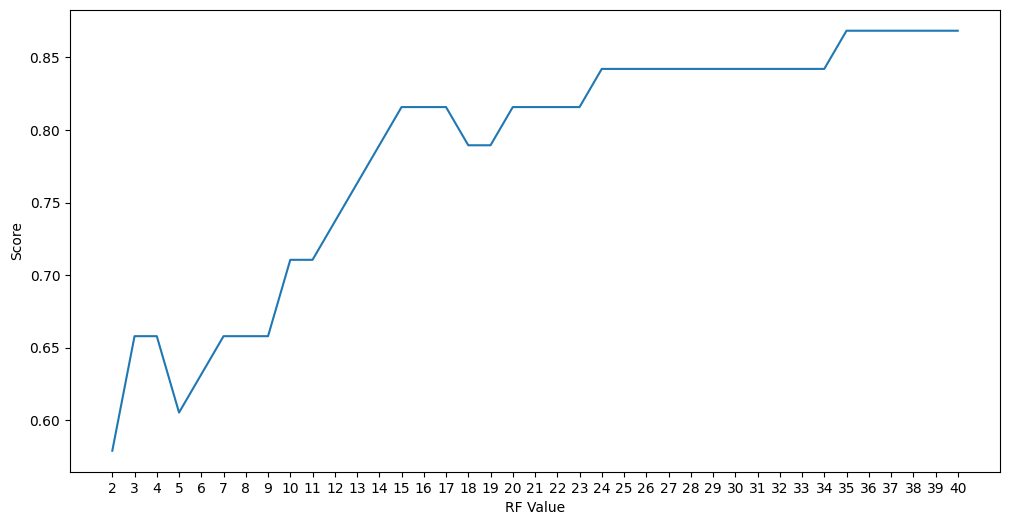

Random Forest Accuracy:  86.8421052631579


In [29]:
# 6. Random Forest

score_list = []
for i in range(2,41):
    RF_clf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RF_clf.fit(X_train, y_train)
    score_list.append(RF_clf.score(X_test, y_test))

plt.figure(figsize=(12,6))     
plt.plot(range(2,41), score_list)
plt.xticks(np.arange(2,41,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.savefig('figures//Random_Forest.png', bbox_inches='tight')  
plt.show()
RF_Acc = max(score_list)
print("Random Forest Accuracy: ",RF_Acc*100)

In [30]:
# 7. Gradient Boosting

params_GB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

GB = RandomizedSearchCV(GradientBoostingClassifier(), params_GB, cv=20)
GB.fit(X_train, y_train)

print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GB_clf = GradientBoostingClassifier(subsample=0.2, n_estimators=200, max_depth=4, max_leaf_nodes=10)
GB_clf.fit(X_train, y_train)

y_pred = GB_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

GB_Acc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: ',GB_Acc*100)

GradientBoostingClassifier(max_leaf_nodes=50, n_estimators=200, subsample=0.5)
0.85
{'subsample': 0.5, 'n_estimators': 200, 'max_leaf_nodes': 50, 'max_depth': 3}
0
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.88      0.88      0.88        24

    accuracy                           0.84        38
   macro avg       0.83      0.83      0.83        38
weighted avg       0.84      0.84      0.84        38

[[11  3]
 [ 3 21]]
Gradient Boosting accuracy:  84.21052631578947


In [31]:
## Model Comparison

compare = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LogR_Acc*100, KNN_Acc*100, SVC_Acc*100, 
                                     NB_Acc1*100, NB_Acc2*100, DT_Acc*100, 
                                     RF_Acc*100, GB_Acc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,KNN,89.473684
6,Random Forest,86.842105
5,Decision Tree,84.210526
7,Gradient Boost,84.210526
3,Categorical NB,65.789474
0,Logistic Regression,60.526316
2,SVM,60.526316
4,Gaussian NB,60.526316


## Prediction

In [32]:
# Prediction using Random Forest
X_val=validation_df.values
y_pred = RF_clf.predict(X_val)
val_df = pd.read_csv("validation.csv")
val_df['Predicted_Value']=y_pred
val_df.to_csv("result.csv",index=False)